## Proyecto 2: Análisis en SQL
### La reconfiguración de la información: Un estudio del conjunto de datos BankChurners

El presente proyecto se concibe como una aproximación al análisis del conjunto de datos **BankChurners** desde una perspectiva formal y estructurada. El objetivo central reside en la optimización y reconfiguración de este *dataset* —previamente abordado en un contexto diferente—, trasladándolo de un formato plano a una **arquitectura de base de datos relacional**. Esta transición no es un mero ejercicio técnico, sino una estrategia deliberada para maximizar el potencial analítico y la integridad de la información.

### Fundamentos y beneficios de un enfoque relacional

La adopción de un modelo relacional introduce una serie de ventajas fundamentales para la gestión y exploración de datos a gran escala.

1.  **Normalización**: Erradica la duplicidad de registros y minimiza las inconsistencias, lo que a su vez fortalece la integridad referencial. Este proceso garantiza que cada entidad de datos exista de manera única y coherente dentro del sistema.

2.  **Escalabilidad**: La arquitectura propuesta incrementa la escalabilidad, permitiendo una gestión ordenada y eficiente del crecimiento exponencial del *dataset*. Al estructurar la información en tablas interconectadas, se establecen las bases para un sistema robusto, capaz de evolucionar sin comprometer su rendimiento.

3.  **Flexibilidad**: Se manifiesta en la capacidad de realizar consultas más complejas y potentes. La articulación de datos a través de **`JOINs`** y funciones avanzadas de SQL habilita la ejecución de análisis multifacéticos y la exploración de relaciones que, en un formato plano, serían de difícil acceso.

4.  **Análisis avanzado**: Esta reestructuración sienta un precedente sólido para el análisis avanzado. La organización meticulosa de la información facilita su posterior integración con plataformas de visualización, herramientas de análisis estadístico y modelos de *machine learning*, actuando como un puente entre la gestión de datos y la inteligencia de negocios.

## Aportes Metodológicos del Proyecto

El valor añadido de este trabajo académico se manifiesta en varias decisiones de diseño clave. Para mejorar la accesibilidad y la comprensión, los nombres de las tablas y campos se tradujeron al español. Esta adaptación lingüística facilita el análisis para una audiencia de habla hispana, haciendo más accesibles los insights que los datos pueden ofrecer.

Además, se ha diseñado un esquema relacional que separa claramente los **datos estáticos del cliente** (como edad, género y nivel educativo) de los **datos dinámicos** (que incluyen transacciones y cambios de comportamiento). Esta distinción metodológica no solo organiza la información de manera lógica, sino que también permite un análisis más estratificado y granular.

En conclusión, este proyecto va más allá de la simple conversión de un archivo. Se presenta como un ejemplo riguroso y sistemático de cómo un *dataset* crudo puede transformarse en un sistema de base de datos relacional. El resultado es un recurso valioso para la investigación y el desarrollo de portafolios, que ilustra con claridad la aplicación de principios de diseño de bases de datos para el análisis exploratorio y la toma de decisiones estratégicas.

## Hoja de Ruta del Proyecto


El desarrollo de este proyecto seguirá un camino estructurado para transformar un *dataset* plano en una base de datos relacional lista para el análisis.

1.  **Creación del esquema**: Primero, crearemos un esquema en **MySQL** llamado `credit_card`. Este será nuestro espacio de trabajo para construir la estructura necesaria para organizar la información.

2.  **Importación del *dataset***: A continuación, usaremos el asistente de **MySQL Workbench** para importar el *dataset* original, **BankChurners**. Esto generará una tabla inicial llamada `bankchurner`, que será nuestro punto de partida.

3.  **Análisis exploratorio inicial**: Una vez importado el *dataset*, realizaremos consultas exploratorias para entender su composición. Identificaremos los tipos de datos, revisaremos sus valores y observaremos las categorías presentes. Este análisis nos permitirá definir la estructura del modelo relacional final.

4.  **Diseño del modelo relacional**: Con la información exploratoria en mano, diseñaremos la estructura normalizada de la base de datos. Decidiremos qué tablas crear, cómo se relacionarán y qué campos formarán parte de catálogos o dimensiones auxiliares. El objetivo es construir un modelo **entidad-relación** que distinga entre información estática del cliente y datos dinámicos de su comportamiento.

5.  **Creación de tablas y traducción**: Llevaremos el diseño a la práctica creando las tablas normalizadas dentro del esquema `credit_card`. Para facilitar la comprensión a los hispanohablantes, los nombres de las tablas y campos serán traducidos al español.

6.  **Análisis exploratorio con SQL**: Una vez estructurada la información, realizaremos un análisis exploratorio directamente con SQL. Generaremos consultas para descubrir distribuciones, segmentar clientes por variables sociodemográficas, evaluar su comportamiento transaccional y detectar señales de abandono de clientes (*attrition*).

7.  **Documentación**: Finalmente, documentaremos todo el proceso en este repositorio, explicando las decisiones de diseño de la base de datos, los beneficios de la normalización y ejemplos de consultas que demuestren el valor del enfoque SQL en el análisis del *dataset*.

## Análisis de la Estructura Inicial
Tras crear el esquema en MySQL Workbench, ejecutamos la sentencia `DESCRIBE` sobre la tabla importada **BankChurners**. Este primer paso nos permite ver la composición de los datos, los tipos de campo, las restricciones y las posibles inconsistencias que podrían afectar el modelo.

Basados en estos resultados, elaboramos una tabla resumen que detalla cada campo con su tipo actual, recomendaciones de ajuste o restricción, su clasificación funcional y las observaciones más importantes. Esta tabla es la base para el proceso de **normalización**, para validar la integridad referencial y para establecer criterios técnicos que ayuden a depurar el esquema. El objetivo de este análisis es anticipar decisiones estructurales que fortalezcan la consistencia del modelo, mejoren la escalabilidad y faciliten su adaptación futura.


| Campo | Tipo actual | Tipo recomendado | Clasificación | Observaciones |
| :--- | :--- | :--- | :--- | :--- |
| `CLIENTNUM` | `int` | `INT UNSIGNED NOT NULL PRIMARY KEY` | Identificador único | Marcar `NOT NULL` y clave primaria; garantiza integridad y facilita *joins*. |
| `Attrition_Flag` | `text` | `ENUM('Existing','Attrited') NOT NULL` | Categórica (baja cardinalidad) | Mejorar definición con `ENUM` o tabla de dimensión; restringe valores. |
| `Customer_Age` | `int` | `SMALLINT UNSIGNED NOT NULL` | Numérica continua | Validar rango (ej. 18–100); definir `CHECK` si MySQL lo permite. |
| `Gender` | `text` | `ENUM('M','F') NOT NULL` | Categórica (baja cardinalidad) | Convertir a `ENUM` para validación; o tabla auxiliar si planeas más géneros. |
| `Dependent_count`| `int` | `TINYINT UNSIGNED NOT NULL` | Numérica discreta | Rango de 0–10; usar `TINYINT` y `CHECK`. |
| `Education_Level`| `text` | `VARCHAR(20) NOT NULL / DIM_Educación` | Categórica (media cardinalidad) | Crear tabla dimensión `dim_educacion` para homogeneizar niveles. |
| `Marital_Status`| `text` | `VARCHAR(15) NOT NULL / DIM_Marital` | Categórica (media cardinalidad) | Tabla `dim_estado_civil` para reducir redundancia. |
| `Income_Category`| `text` | `VARCHAR(20) NOT NULL / DIM_Ingreso` | Categórica (media cardinalidad) | Tabla `dim_categoria_ingreso` para mapear rangos de ingresos. |
| `Card_Category`| `text` | `VARCHAR(20) NOT NULL / DIM_Tarjeta` | Categórica (baja cardinalidad) | Tabla `dim_tipo_tarjeta` si consideras metadatos extra (beneficios, *fees*). |
| `Months_on_book`| `int` | `SMALLINT UNSIGNED NOT NULL` | Numérica discreta | Tiempo en meses; útil en *fact table* de *snapshot*. |
| `Total_Relationship_Count`| `int` | `TINYINT UNSIGNED NOT NULL` | Numérica discreta | Cuenta de productos contratados; formará parte del hecho. |
| `Months_Inactive_12_mon`| `int` | `TINYINT UNSIGNED NOT NULL` | Numérica discreta | Meses inactivos en último año; indicador de riesgo. |
| `Contacts_Count_12_mon`| `int` | `TINYINT UNSIGNED NOT NULL` | Numérica discreta | Interacciones con servicio; posible métrica de *engagement*. |
| `Credit_Limit` | `int` | `DECIMAL(12,2) NOT NULL` | Numérica continua | Límite de crédito; ajustar *precision/scale* para *cents*. |
| `Total_Revolving_Bal`| `int` | `DECIMAL(12,2) NOT NULL` | Numérica continua | Saldo rotativo; misma recomendación de `DECIMAL` para montos. |
| `Avg_Open_To_Buy`| `int` | `DECIMAL(12,2) NOT NULL` | Numérica continua | Crédito disponible promedio; `DECIMAL`. |
| `Total_Amt_Chng_Q4_Q1`| `double` | `DECIMAL(6,3) NOT NULL` | Ratio (float) | Cambio porcentual entre trimestres; `DECIMAL(6,3)` para 0.000–999.999. |
| `Total_Trans_Amt`| `int` | `DECIMAL(12,2) NOT NULL` | Numérica continua | Monto transaccional total; `DECIMAL`. |
| `Total_Trans_Ct`| `int` | `INT UNSIGNED NOT NULL` | Numérica discreta | Conteo total de transacciones. |
| `Total_Ct_Chng_Q4_Q1`| `double` | `DECIMAL(6,3) NOT NULL` | Ratio (float) | Cambio de conteo transacciones Q4 vs Q1. |
| `Avg_Utilization_Ratio`| `double` | `DECIMAL(5,4) NOT NULL` | Ratio (float) | Porcentaje promedio de utilización; `DECIMAL(5,4)` para 0.0000–9.9999. |

## Validación de Cardinalidades por Dimensión

El primer paso es validar las cardinalidades de cada dimensión categórica. Para ello, se consultan los valores únicos de los siguientes campos:

### `Education_Level`
* 'College'
* 'Doctorate'
* 'Graduate'
* 'High School'
* 'Post-Graduate'
* 'Uneducated'
* 'Unknown'

### `Marital_Status`
* 'Divorced'
* 'Married'
* 'Single'
* 'Unknown'

### `Income_Category`
* '$120K +'
* '$40K - $60K'
* '$60K - $80K'
* '$80K - $120K'
* 'Less than $40K'
* 'Unknown'

### `Card_Category`
* 'Blue'
* 'Gold'
* 'Platinum'
* 'Silver'

### `Attrition_Flag`
* 'Attrited Customer'
* 'Existing Customer'

### `Gender`
* 'F'
* 'M'

## Creación de Tablas Dimensionales
Como parte del proceso de normalización, primero validamos la cardinalidad de las principales dimensiones categóricas en la tabla **BankChurners**. Esta validación nos permite identificar los valores únicos en variables como `Education_Level`, `Marital_Status`, `Income_Category`, `Card_Category`, `Attrition_Flag` y `Gender`. Con esta información, podemos detectar inconsistencias, categorías ambiguas y oportunidades para mejorar la estructura.

Luego, creamos tablas dimensionales estáticas para cada una de estas variables. Cada tabla tiene una clave primaria numérica (`TINYINT UNSIGNED AUTO_INCREMENT`) y una restricción de unicidad en el campo descriptivo, lo que asegura la integridad y evita duplicados.

Esta separación reduce la redundancia en la tabla principal, mejora el seguimiento de los datos y prepara el modelo para futuras integraciones con tablas de hechos o procesos ETL (Extract, Transform, Load). El resultado es una arquitectura modular, escalable y alineada con las mejores prácticas de diseño relacional.

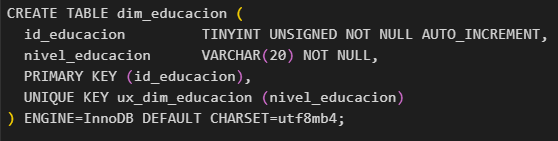

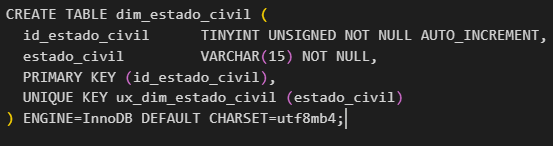

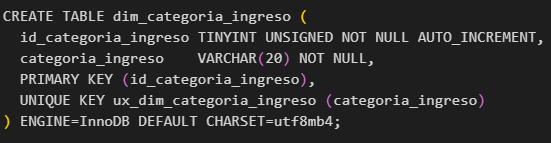

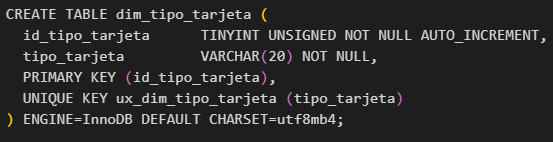

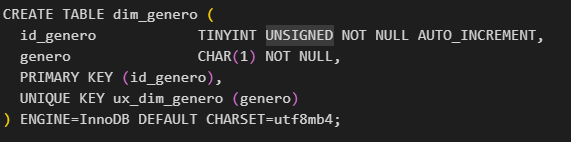

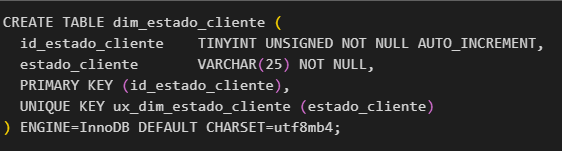

## Definición de la Tabla de Hechos Cliente
Se han realizado ajustes en la base de datos para optimizar la estructura y organización, siguiendo un enfoque de **modelo de datos relacional**. Estos cambios se han centrado en la creación de una **tabla de hechos**, el renombrado de la tabla de origen y la validación de las relaciones.

### Tabla de Hechos Clientes
La nueva tabla de hechos, denominada **clientes**, centraliza las **métricas clave** y los **atributos de los clientes**. Ha sido diseñada como el punto focal del modelo, conectándose a distintas tablas de dimensiones que contienen descripciones detalladas de atributos categóricos, como la **educación**, el **estado civil** y el **tipo de tarjeta**.


### Claves y Relaciones
La **clave primaria** `cliente_num` asegura la unicidad de cada registro, mientras que las **claves foráneas** (`foreign keys`) establecen vínculos con las tablas de dimensiones. Esto permite la realización de **consultas eficientes** y mantiene una **estructura de datos organizada**.

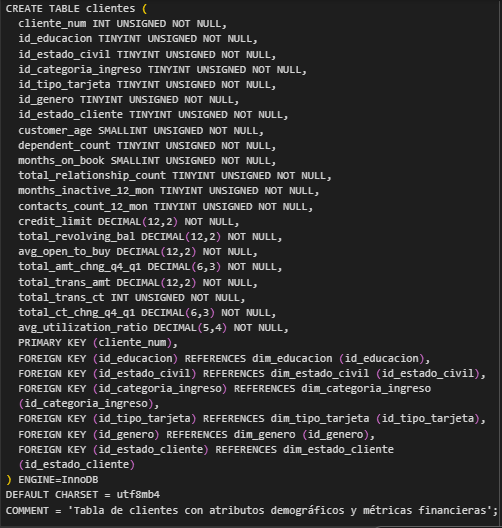

## Renombrado y Validación

Se ha renombrado la tabla original `bankchurners` a `stg_dataset` (staging dataset) para reflejar su rol como **área de preparación** o *staging*. Esta práctica es común en los procesos **ETL** (Extracción, Transformación y Carga), donde los datos brutos se almacenan temporalmente antes de ser procesados e insertados en las tablas finales.


### Validación de los Cambios

Se han ejecutado consultas para **validar los cambios** en el esquema de la base de datos. Se ha verificado que la tabla `stg_dataset` ha adoptado correctamente su nuevo nombre y que las tablas de dimensiones están presentes. Esto asegura que el **modelo de datos** se implemente según lo esperado.


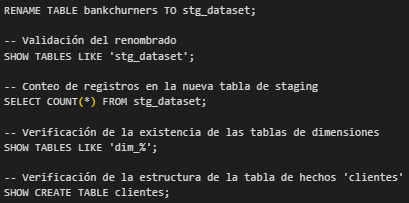

Estos pasos de diseño y validación garantizan una **estructura de base de datos robusta**, **escalable** y **fácil de mantener**, preparando el terreno para futuros **análisis de datos**.

## Inserción de Datos en Tablas de Dimensiones

Para poblar el **modelo de datos relacional**, se insertan los datos estáticos en cada una de las tablas de dimensiones. Estas tablas contienen los atributos categóricos del negocio, como **educación** o **estado civil**, y se completan manualmente con los valores únicos obtenidos del conjunto de datos original.

El objetivo de este paso es construir un **diccionario de datos centralizado y normalizado**. En lugar de almacenar cadenas de texto repetidas en la tabla de hechos, se registran **identificadores numéricos (`id`)** en la tabla **clientes**. Este enfoque **optimiza el rendimiento y el uso de espacio** en la base de datos, además de facilitar la gestión, ya que cualquier cambio en la descripción de una categoría se aplica en un único lugar.

### Proceso de Inserción

Se emplean sentencias `INSERT INTO ... VALUES` para añadir las filas a cada tabla de dimensión de forma individual. Los valores provienen del análisis inicial del conjunto de datos y abarcan todas las categorías posibles para cada atributo.

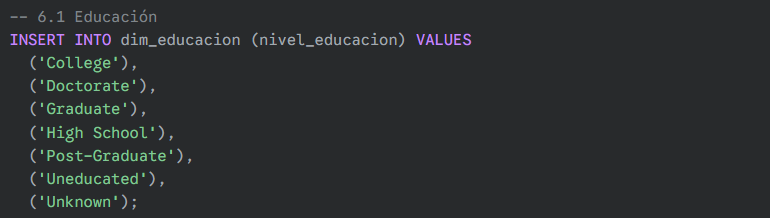

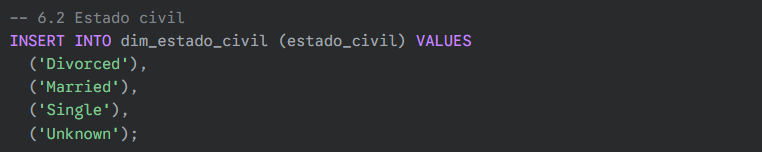

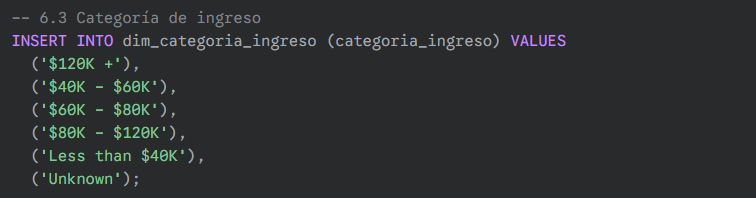

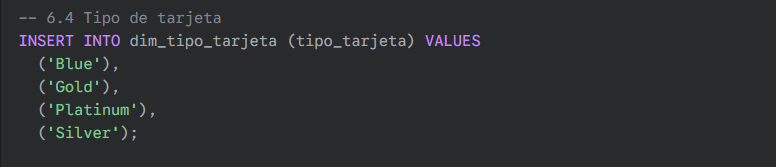

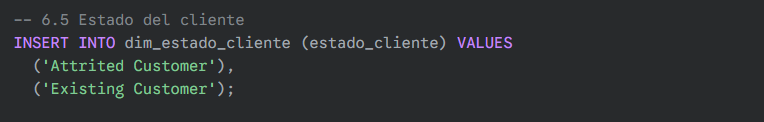

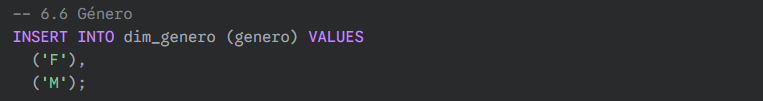

## Validación de la Inserción
Una vez que los datos se han insertado, se ejecuta una consulta de validación para comprobar que el número de registros en cada tabla de dimensión es el esperado. Para lograrlo, se usa la sentencia `UNION ALL`, que combina los resultados de cada conteo en una única tabla, lo que ofrece una visión general rápida y concisa del estado de las tablas de dimensiones.

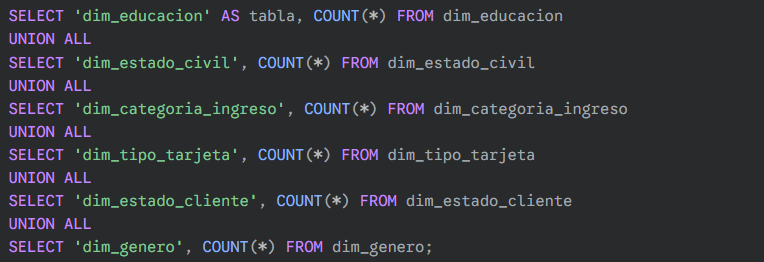

El proceso de inserción y validación **concluye la fase de preparación de las tablas de dimensiones**. Estas tablas **quedan listas para vincularse con los datos de la tabla de hechos** en las siguientes etapas de la transformación.

## Proceso de Carga y Validación de Datos

Esta etapa representa la culminación del proceso de **transformación de datos (ETL)**, donde los datos de la tabla de origen, `stg_dataset`, se extraen, se procesan y se cargan en la tabla de hechos final, `clientes`. El objetivo principal es **normalizar los datos** y vincularlos a las tablas de dimensiones previamente pobladas.


### Carga de Datos en la Tabla de Hechos

La inserción de datos se realizó usando una sentencia `INSERT ... SELECT`, un método eficiente para transferir grandes volúmenes de datos entre tablas. La clave de esta operación fue el uso de múltiples **`JOIN`** para conectar la tabla de origen (`stg_dataset`) con cada una de las tablas de dimensiones (`dim_educacion`, `dim_estado_civil`, etc.).

Durante la unión, se aplicó la función `TRIM()` a los campos de texto de la tabla de origen para eliminar cualquier espacio en blanco (`' '`) al principio o al final de las cadenas. Esto es crucial para asegurar que las uniones coincidan correctamente con los datos de las tablas de dimensiones. En lugar de copiar los valores de texto originales (como 'Graduate'), se insertan los **identificadores (`id`)** correspondientes, lo que optimiza el espacio de almacenamiento y el rendimiento.

El proceso completo se ejecutó dentro de una **transacción** (`START TRANSACTION; ... COMMIT;`). Esto garantiza que todas las operaciones de inserción se completen con éxito o que, en caso de cualquier error, se reviertan por completo, manteniendo la **consistencia de los datos**.

In [ ]:
START TRANSACTION;

INSERT INTO clientes (
    cliente_num,
    id_educacion,
    id_estado_civil,
    id_categoria_ingreso,
    id_tipo_tarjeta,
    id_genero,
    id_estado_cliente,
    customer_age,
    dependent_count,
    months_on_book,
    total_relationship_count,
    months_inactive_12_mon,
    contacts_count_12_mon,
    credit_limit,
    total_revolving_bal,
    avg_open_to_buy,
    total_amt_chng_q4_q1,
    total_trans_amt,
    total_trans_ct,
    total_ct_chng_q4_q1,
    avg_utilization_ratio
)
SELECT
    stg.client_num,
    dim_e.id_educacion,
    dim_ec.id_estado_civil,
    dim_ci.id_categoria_ingreso,
    dim_tt.id_tipo_tarjeta,
    dim_g.id_genero,
    dim_ecle.id_estado_cliente,
    stg.customer_age,
    stg.dependent_count,
    stg.months_on_book,
    stg.total_relationship_count,
    stg.months_inactive_12_mon,
    stg.contacts_count_12_mon,
    stg.credit_limit,
    stg.total_revolving_bal,
    stg.avg_open_to_buy,
    stg.total_amt_chng_q4_q1,
    stg.total_trans_amt,
    stg.total_trans_ct,
    stg.total_ct_chng_q4_q1,
    stg.avg_utilization_ratio
FROM
    stg_dataset AS stg
JOIN
    dim_educacion AS dim_e ON TRIM(stg.education_level) = TRIM(dim_e.nivel_educacion)
JOIN
    dim_estado_civil AS dim_ec ON TRIM(stg.marital_status) = TRIM(dim_ec.estado_civil)
JOIN
    dim_categoria_ingreso AS dim_ci ON TRIM(stg.income_category) = TRIM(dim_ci.categoria_ingreso)
JOIN
    dim_tipo_tarjeta AS dim_tt ON TRIM(stg.card_category) = TRIM(dim_tt.tipo_tarjeta)
JOIN
    dim_genero AS dim_g ON TRIM(stg.gender) = TRIM(dim_g.genero)
JOIN
    dim_estado_cliente AS dim_ecle ON TRIM(stg.attrition_flag) = TRIM(dim_ecle.estado_cliente);

COMMIT;

## Validación del Resultado y Limpieza

Después de la carga, se ejecutan varias verificaciones para asegurar la integridad de los datos:

* **Conteo de Registros:** Se compara el número total de registros entre la tabla de origen (`stg_dataset`) y la tabla de destino (`clientes`) para confirmar que no se ha perdido información durante el proceso.
* **Estadísticas de Campos:** Se validan estadísticas básicas (mínimos, máximos y recuento de valores nulos) de métricas clave como `credit_limit` y `avg_utilization_ratio`, verificando que los datos se transfieren correctamente sin distorsiones.
* **Inspección de Datos:** Se consultan las primeras filas de la tabla `clientes` para una inspección visual, confirmando que la estructura y los datos coinciden con lo esperado.

### Limpieza de Staging

Se elimina de forma permanente la tabla de origen `stg_dataset` usando `DROP TABLE`. Una vez que los datos se procesan y cargan en su destino final, la tabla de *staging* deja de ser necesaria, lo que ayuda a mantener el entorno de la base de datos limpio y optimizado.

Estos pasos de validación aseguran la calidad de los datos y la fiabilidad de la nueva tabla `clientes`, la cual queda lista para su uso en consultas analíticas y reportes.



## Conversión de Datos al Español

Para mejorar la legibilidad y la usabilidad de la tabla `clientes`, se traducen los nombres de las columnas del inglés al español. Este proceso se realiza en varios pasos secuenciales para preservar la integridad del modelo de datos.

### Traducción de los Nombres de Columnas

1.  **Eliminación de Claves:** Se identifican y eliminan temporalmente las claves foráneas (FK) y la clave primaria (PK), ya que la mayoría de los sistemas de gestión de bases de datos (DBMS) no permiten renombrar una columna que forma parte de una restricción de clave. La eliminación se realiza consultando el `information_schema` para obtener los nombres de las restricciones, seguida de la sentencia `ALTER TABLE ... DROP FOREIGN KEY`.

2.  **Renombrado de Columnas:** Una vez eliminadas las restricciones, se aplican sentencias `ALTER TABLE ... RENAME COLUMN` para cambiar los nombres de las columnas a su equivalente en español. Por ejemplo, `customer_age` se renombra a `edad` y `credit_limit` a `limite_credito`.

3.  **Restablecimiento de Claves:** Finalmente, se recrean la clave primaria y las claves foráneas mediante `ALTER TABLE ... ADD PRIMARY KEY` y `ALTER TABLE ... ADD CONSTRAINT ... FOREIGN KEY`. Al recrear estas restricciones, se utilizan nombres más descriptivos, como `fk_clientes_educacion`, para mejorar la comprensión de las relaciones entre tablas.


### Traducción de Datos de Tablas de Dimensiones

La segunda parte del proceso se centra en traducir los valores categóricos almacenados en las tablas de dimensiones. Se emplean sentencias `UPDATE` para reemplazar los valores en inglés por sus equivalentes en español. Por ejemplo:

* En la tabla `dim_educacion`, el valor 'College' se actualiza a 'Universidad'.
* En la tabla `dim_estado_civil`, 'Married' se cambia a 'Casado'.
* En la tabla `dim_categoria_ingreso`, los valores se traducen y se ajusta el tipo de dato de la columna para acomodar cadenas de texto más largas.

Este enfoque de traducción a nivel de datos garantiza que los reportes y análisis futuros se presenten con etiquetas claras y en el idioma local, sin necesidad de traducciones adicionales en la capa de visualización o aplicación.

La fase de validación final, mediante consultas `SELECT * FROM dim_...`, confirma que todas las actualizaciones se ejecutan correctamente y que los datos se muestran de manera consistente en español en todo el modelo.

## Creación de Vistas para Análisis y Reportes

Se implementan **vistas** como una herramienta fundamental para simplificar y optimizar el acceso a los datos. Al encapsular consultas complejas en objetos de base de datos reutilizables, las vistas proporcionan una capa de abstracción que facilita a los usuarios finales, como analistas o herramientas de inteligencia de negocios, la extracción de información sin la necesidad de comprender la estructura subyacente de las tablas y sus uniones.

### Vista Principal: `vw_clientes_detalle`

La primera vista, `vw_clientes_detalle`, sirve como base para todos los análisis posteriores. Esta vista une la tabla de hechos **clientes** con todas las tablas de dimensiones. Al hacerlo, traduce los **identificadores numéricos (`id`)** en descripciones de texto claras (por ejemplo, `id_educacion` se convierte en `nivel_educacion`), ofreciendo una visión completa y desnormalizada de los datos de cada cliente. Esta vista elimina la necesidad de realizar múltiples `JOIN` cada vez que se requiere consultar la información completa de un cliente.

## Creación de Vistas para Análisis y Reportes

Se implementan **vistas** como una herramienta fundamental para simplificar y optimizar el acceso a los datos. Al encapsular consultas complejas en objetos de base de datos reutilizables, las vistas proporcionan una capa de abstracción que facilita a los usuarios finales, como analistas o herramientas de inteligencia de negocios, la extracción de información sin la necesidad de comprender la estructura subyacente de las tablas y sus uniones.


### Vista Principal: `vw_clientes_detalle`

La primera vista, `vw_clientes_detalle`, sirve como base para todos los análisis posteriores. Esta vista une la tabla de hechos **clientes** con todas las tablas de dimensiones. Al hacerlo, traduce los **identificadores numéricos (`id`)** en descripciones de texto claras (por ejemplo, `id_educacion` se convierte en `nivel_educacion`), ofreciendo una visión completa y desnormalizada de los datos de cada cliente. Esta vista elimina la necesidad de realizar múltiples `JOIN` cada vez que se requiere consultar la información completa de un cliente.

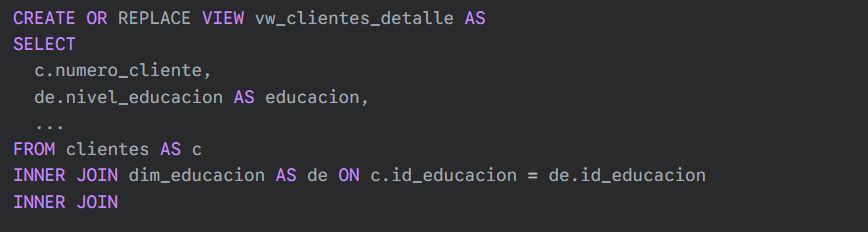

## Vistas Analíticas para Métricas Clave

Se crean varias vistas especializadas a partir de `vw_clientes_detalle` para calcular **métricas de negocio esenciales**. Estas vistas están diseñadas para responder preguntas específicas sobre el comportamiento de los clientes, la utilización de productos y la rentabilidad.

* `vw_churn_por_educacion`: Calcula la **tasa de churn** (abandono) por nivel educativo, permitiendo identificar si ciertos segmentos educativos muestran una mayor tendencia a abandonar el servicio.
* `vw_limite_promedio_por_ingreso`: Muestra el **límite de crédito promedio** por categoría de ingresos, facilitando la evaluación de la correlación entre el ingreso del cliente y el crédito otorgado.
* `vw_utilizacion_por_tarjeta`: Se centra en el **ratio de utilización de crédito promedio** por tipo de tarjeta (Blue, Gold, etc.), ayudando a comprender cómo cada segmento utiliza su crédito disponible.
* `vw_resumen_transaccional_tarjeta`: Proporciona un resumen del comportamiento transaccional (**monto y cantidad de transacciones**) por tipo de tarjeta, permitiendo analizar patrones de gasto.
* `vw_clasificacion_genero_tarjeta`: Ofrece una visión multifacética del comportamiento del cliente combinando **género y tipo de tarjeta**. Esta vista permite un análisis granular de métricas como límite de crédito promedio, utilización y tasa de churn para cada combinación de estos dos atributos.


La creación de estas vistas finaliza la fase de **modelado de datos**, dejando un conjunto de datos limpio, estructurado y optimizado para el **análisis de negocio y la generación de informes**.

## Ejecución de Consultas para Análisis Exploratorio

Se ejecuta una serie de consultas analíticas sobre el modelo de datos para obtener información valiosa sobre el comportamiento de los clientes. El objetivo principal de esta fase es identificar patrones, detectar segmentos de riesgo y fundamentar futuras decisiones de negocio.


### Análisis de Churn por Nivel Educativo

La primera consulta se centra en la **tasa de abandono (churn)** de clientes, segmentada por nivel educativo. Se utiliza la vista `vw_churn_por_educacion` para simplificar este cálculo. El análisis revela diferencias significativas que requieren atención.

| Nivel Educativo | Tasa de Churn (%) | Observación Clave |
| :--- | :--- | :--- |
| Doctorado | 21.06% | La más alta, grupo de alto riesgo |
| Postgrado | 17.83% | Elevada, sugiere un perfil exigente |
| Desconocido | 16.85% | Alto riesgo, falta de información crítica |
| Sin educación | 15.94% | Ligeramente superior al promedio |
| Graduado | 15.57% | Cerca del promedio, grupo numeroso |
| Secundaria | 15.20% | Tasa estable, comportamiento típico |
| Universidad | 15.20% | Tasa similar a Secundaria |



### Interpretación

El análisis muestra que los clientes con niveles educativos más altos (**Doctorado** y **Postgrado**) presentan una tasa de abandono significativamente mayor que el resto. Esto sugiere que, aunque son grupos pequeños, tienen expectativas elevadas respecto al servicio, los beneficios o los productos financieros que la empresa no satisface completamente.

El grupo "**Desconocido**" también registra una tasa de churn elevada. La falta de información impide una segmentación efectiva y dificulta la implementación de estrategias de retención personalizadas.

En contraste, los clientes con niveles educativos de **Secundaria**, **Universidad** y **Graduado** muestran tasas de abandono más bajas y estables, lo que los convierte en segmentos predecibles y potencialmente más leales a la marca.



### Recomendaciones

* **Estrategia de Retención Segmentada:** Se recomienda diseñar campañas de retención específicas para los clientes con Doctorado y Postgrado, ofreciendo beneficios exclusivos, atención personalizada o productos premium alineados con su perfil de alto valor.
* **Enriquecimiento de Datos:** Es crucial investigar la causa de los registros "Desconocidos". Se debe implementar un proceso para capturar esta información o, en su defecto, inferir el nivel educativo a partir de otras variables, como el rango de ingresos o el tipo de tarjeta.
* **Monitoreo Continuo:** Aunque las tasas de churn en los grupos estables son bajas, se debe supervisar su comportamiento para detectar cambios. Además, el grupo "Sin educación" merece atención especial, ya que podría indicar un riesgo latente.
* **Base para Modelos Predictivos:** Los segmentos más estables (Secundaria, Universidad, Graduado) sirven como punto de partida para construir modelos predictivos del comportamiento de los clientes, dada su consistencia.

## Análisis del Límite de Crédito Promedio por Ingresos

La segunda consulta analítica se centra en la relación entre el límite de crédito asignado a los clientes y su categoría de ingresos. Este análisis permite evaluar si las políticas de otorgamiento de crédito se alinean con la capacidad financiera declarada por los clientes. Se utiliza la vista `vw_limite_promedio_por_ingreso` para generar estos datos.

| Categoría de Ingreso | Límite Promedio (USD) | Límite Mín (USD) | Límite Máx (USD) | Observación Clave |
| :--- | :--- | :--- | :--- | :--- |
| Menos de USD 40.000 | 3.754,38 | 1.438,00 | 15.987,00 | Promedio bajo con valores atípicos notables |
| USD 40.000 – USD 60.000 | 5.462,24 | 1.438,00 | 23.981,00 | Incremento constante en el límite promedio |
| USD 60.000 – USD 80.000 | 10.758,77 | 1.438,00 | 34.516,00 | Salto significativo en el promedio |
| USD 80.000 – USD 120.000 | 15.809,89 | 1.438,00 | 34.516,00 | Sigue una curva de crecimiento coherente |
| Más de USD 120.000 | 19.717,32 | 1.438,00 | 34.516,00 | Máximo promedio alcanzado, refleja clientes de alto valor |
| Desconocido | 9.516,57 | 1.438,00 | 34.516,00 | Grupo heterogéneo, con un promedio medio-alto |



### Análisis de Patrones y Anomalías

Los resultados confirman una **relación casi lineal entre el nivel de ingresos y el límite de crédito promedio**: a mayor categoría de ingresos, mayor es el crédito asignado. Este patrón valida que la política crediticia se fundamenta en la capacidad de pago reportada por los clientes.

Sin embargo, el análisis también identifica algunas anomalías importantes:

* **Límite Base Estándar:** El límite de crédito mínimo de 1.438 USD se mantiene en todas las categorías, lo que indica un posible límite base estándar para todos los nuevos clientes.
* **Anomalías en Segmentos de Bajo Ingreso:** El segmento "Menos de USD 40.000" presenta clientes con límites de hasta 15.987 USD. Estos valores atípicos requieren auditoría, ya que podrían originarse por factores no registrados, como co-aplicantes o garantías. Es crucial verificar que su asignación cumpla con los criterios de riesgo adecuados.
* **Heterogeneidad en el Grupo "Desconocido":** El grupo de ingresos "Desconocido" registra un límite de crédito promedio de 9.516 USD, lo que lo sitúa entre los segmentos de 40.000–60.000 USD y 60.000–80.000 USD. La falta de información impide asignar crédito de manera precisa y puede incluir tanto clientes de alto como de bajo riesgo.



### Recomendaciones

* **Auditar Casos Atípicos:** Se recomienda auditar los casos en los que se asignan límites de crédito altos a clientes de bajos ingresos, para asegurar el cumplimiento de las políticas internas de riesgo.
* **Mejorar la Recopilación de Datos:** Se debe implementar una estrategia para reducir la cantidad de clientes en la categoría "Desconocido". La captura precisa de datos de ingresos es clave para una segmentación más efectiva y una gestión de riesgo robusta.
* **Ajustes de Política Crediticia:** Los promedios de límite de crédito por categoría de ingresos sirven como línea base para futuras revisiones de la política crediticia, permitiendo establecer límites más dinámicos considerando también el comportamiento transaccional del cliente.

## Análisis de la Utilización Promedio por Tipo de Tarjeta

Este análisis se centra en el **ratio de utilización del crédito**, una métrica clave que indica la proporción del límite de crédito que los clientes usan. La consulta se ejecuta sobre la vista `vw_utilizacion_por_tarjeta` para identificar diferencias en el comportamiento de uso según el tipo de tarjeta.

| Tipo de Tarjeta | Utilización Promedio (%) |
| :--- | :--- |
| Blue | 29.09% |
| Silver | 5.73% |
| Gold | 5.71% |
| Platinum | 4.37% |


### Interpretación de los Resultados

* **Tarjetas Blue:** Este segmento presenta un ratio de utilización excepcionalmente alto, cercano al **30%**. Este valor supera significativamente al de los demás tipos de tarjeta, lo que indica que los clientes con tarjeta Blue tienen límites de crédito más bajos y dependen en gran medida de ellos para sus transacciones. Este comportamiento podría reflejar un mayor riesgo de sobreendeudamiento o de alcanzar el límite de crédito con frecuencia.
* **Tarjetas Silver y Gold:** Estos segmentos muestran un uso moderado y equilibrado del crédito, con ratios de utilización muy similares, cercanos al **5.7%**. Esto refleja un comportamiento financiero sano, donde los clientes usan una porción razonable de su crédito sin acercarse a niveles de saturación.
* **Tarjetas Platinum:** Este segmento presenta el ratio de utilización más bajo, con solo un **4.37%**. Probablemente se deba a que estos clientes tienen límites de crédito elevados y mantienen un uso conservador. Esto puede representar una oportunidad de negocio no aprovechada, dado que la empresa posee capital de crédito disponible que no genera ingresos por intereses.


### Recomendaciones

* **Segmento Blue:** Se implementa un monitoreo estricto y proactivo. Se sugiere ofrecer educación financiera sobre el uso responsable del crédito y enviar alertas de riesgo cuando los clientes se acercan a su límite. Además, un aumento escalonado del límite de crédito puede aliviar la presión de utilización y mejorar la percepción del cliente.
* **Segmentos Silver y Gold:** Se aprovecha la estabilidad de estos grupos para promover estrategias de **`cross-selling`**. Campañas de incentivos, como *cashback* o puntos de recompensa, pueden fomentar un mayor uso de la tarjeta sin elevar el ratio de utilización a niveles de riesgo.
* **Segmento Platinum:** Se revisa la política de asignación de crédito para este segmento. Se analiza la conveniencia de ajustar los límites o fomentar el uso de la línea, ofreciendo promociones exclusivas o beneficios que incentiven a los clientes a usar una mayor porción de su límite.

## Análisis del Resumen Transaccional por Tipo de Tarjeta

Este análisis se centra en el comportamiento transaccional de los clientes, segmentado por tipo de tarjeta. Se utiliza la vista `vw_resumen_transaccional_tarjeta` para comparar métricas clave como el **monto promedio de las transacciones**, la **cantidad promedio de transacciones** y la **variación estacional de la actividad**.

| Tipo de Tarjeta | Monto Promedio (USD) | Cantidad Promedio de Transacciones | Variación Q4/Q1 |
| :--- | :--- | :--- | :--- |
| Blue | 4.225,41 | 64,03 | 0,760 |
| Silver | 6.590,48 | 74,70 | 0,762 |
| Gold | 7.685,61 | 81,52 | 0,773 |
| Platinum | 8.999,75 | 86,95 | 0,780 |


### Análisis e Interpretación

Los resultados muestran una **relación lineal** entre la categoría de la tarjeta y la actividad transaccional de los clientes. A medida que la categoría de la tarjeta aumenta (de Blue a Platinum), tanto el monto promedio como la cantidad promedio de transacciones también aumentan. Esto indica que los clientes en **segmentos de mayor valor** (Gold y Platinum) no solo gastan más por transacción, sino que también realizan compras con mayor frecuencia.

La métrica de **variación Q4/Q1** evidencia un ligero pero consistente incremento en los segmentos de tarjetas superiores. Esto sugiere que los clientes Platinum presentan mayor actividad de gasto estacional, probablemente impulsada por compras de fin de año, manteniendo una parte de este impulso en el trimestre siguiente.

El notable incremento en el monto promedio de transacciones al pasar de la tarjeta Blue a Silver y de Silver a Gold confirma que la segmentación de productos por nivel de gasto funciona de manera efectiva.


### Recomendaciones

* **Ajuste de Ofertas y Estrategias:** Para los clientes Silver y Gold, se diseñan ofertas de **`cross-selling`** o recompensas por volumen de gasto (como `cashback` o puntos) para incentivar un mayor uso y elevar su actividad transaccional. Para los clientes Platinum, se ofrecen productos financieros premium y personalizados, como opciones de inversión o líneas de crédito adicionales, con el fin de aprovechar su alto gasto y fortalecer su lealtad.
* **Gestión de la Estacionalidad:** Se desarrollan campañas de retención post-temporada alta dirigidas a los segmentos de alto valor (Gold y Platinum), buscando mantener el impulso de gasto del cuarto trimestre.
* **Identificación de Oportunidades de Upgrade:** Se analizan los datos de los clientes con tarjeta Blue que presentan montos de transacción o conteos cercanos a los promedios de la tarjeta Silver. Estos clientes son candidatos ideales para un `upgrade`, mejorando su experiencia y fomentando su retención a largo plazo.

## Clasificación por Género y Tipo de Tarjeta

El análisis final se centra en la vista `vw_clasificacion_genero_tarjeta`, la cual permite una segmentación granular combinando dos variables clave: **género** y **tipo de tarjeta**. El objetivo es identificar patrones de comportamiento y riesgo específicos en estos microsegmentos.

El estudio revela tres patrones principales:

* **Límites de crédito más bajos para el segmento femenino:** En todas las categorías, las clientes femeninas presentan un límite de crédito promedio significativamente menor que sus contrapartes masculinas.
* **Relación entre utilización y churn:** Se observa una correlación directa en los clientes del segmento Blue: a mayor utilización de la línea de crédito, mayor es la tasa de abandono.
* **Comportamiento de segmentos pequeños:** Los segmentos Gold y Platinum con clientes femeninos, a pesar de su tamaño reducido, muestran tasas de churn extremadamente altas, lo que indica una posible insatisfacción aguda o falta de valor percibido.


### Resumen de Métricas por Segmento

| Género | Tarjeta | Clientes | Límite Promedio (USD) | Utilización Promedio (%) | Tasa de Churn (%) |
| :--- | :--- | :--- | :--- | :--- | :--- |
| F | Blue | 5.101 | 4.308,04 | 35,53 | 17,45 |
| F | Silver | 210 | 18.614,75 | 7,98 | 13,33 |
| F | Gold | 38 | 20.967,00 | 7,19 | 21,05 |
| F | Platinum | 9 | 26.280,89 | 4,02 | 44,44 |
| M | Blue | 4.335 | 10.959,44 | 21,50 | 14,51 |
| M | Silver | 345 | 29.333,63 | 4,36 | 15,65 |
| M | Gold | 78 | 32.045,55 | 4,99 | 16,67 |
| M | Platinum | 11 | 33.558,27 | 4,65 | 9,09 |


### Análisis Detallado e Implicaciones

El segmento femenino con tarjeta Blue destaca por su **alto riesgo**, presentando límites de crédito bajos que generan una utilización elevada (35,5%) y, en consecuencia, una alta tasa de abandono (17,5%). Este grupo representa una oportunidad significativa para la mejora del producto.

Los segmentos Gold y Platinum con clientes femeninos, aunque de tamaño reducido, muestran un **comportamiento de riesgo extremo**, alcanzando una tasa de churn del 44,44% en el caso de Platinum. Este hallazgo, sujeto a validación estadística, indica posibles problemas en la experiencia del cliente o en los beneficios percibidos por este nicho.

En contraste, el segmento masculino con tarjeta Platinum mantiene una tasa de abandono excepcionalmente baja (9,09%), lo que sugiere que estos clientes perciben un alto valor en su tarjeta, ya sea por beneficios, servicio o estatus.

### Recomendaciones Finales

* **Reajuste de Líneas de Crédito:** Se evalúa la política de asignación de crédito para el segmento femenino, especialmente para las clientes con tarjeta Blue. Un aumento gradual del límite podría reducir la alta utilización y la tasa de churn asociada.
* **Investigación de Nichos de Alto Riesgo:** Se realiza un análisis cualitativo en profundidad sobre los segmentos con tasas de abandono extremas, como Femenino-Platinum. Esto puede incluir entrevistas o encuestas para comprender las causas de su insatisfacción.
* **Personalización de la Retención:** Las campañas de retención se diseñan con un enfoque personalizado, creando ofertas y comunicaciones específicas para cada combinación de género y tipo de tarjeta.
* **Mejora de la Calidad de los Datos:** La alta proporción de clientes con información "Desconocida" en variables clave, como nivel de ingresos, limita la segmentación precisa. Se prioriza la mejora de los procesos de captura de datos.